In [41]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [42]:
#Import Path
path = r'C:\Users\kanch\Documents\World Happiness Report\02 Data\Cleaned Data'

In [43]:
#open 2015.csv 
df_2015 = pd.read_csv(os.path.join(path, '2015.csv'),index_col = False)


In [44]:
#open 2016.csv
df_2016 = pd.read_csv(os.path.join(path, '2016.csv'),index_col = False)

In [45]:
#open 2017.csv

df_2017 = pd.read_csv(os.path.join(path, '2017.csv'),index_col = False)

In [46]:
#open 2018.csv
df_2018 = pd.read_csv(os.path.join(path, '2018.csv'),index_col = False)

In [47]:
#open 2019.csv

df_2019 = pd.read_csv(os.path.join(path, '2019.csv'),index_col = False)

In [48]:
# Concatenate all DataFrames into one
combined_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Find & Import Data Set

In [49]:
# Configure API key
quandl.ApiConfig.api_key = '9VsRWt9d88qTb7CbEDx-'

In [50]:
combined_df = combined_df.drop(columns =['Unnamed: 0'])

In [51]:
combined_df.shape

(782, 16)

In [52]:
combined_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'GDP', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker high', 'Whisker low'],
      dtype='object')

In [53]:
type(combined_df)

pandas.core.frame.DataFrame

In [54]:
combined_df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,NaN,NaN,NaN,NaN
778,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,NaN,NaN,NaN,NaN
779,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,NaN,NaN,NaN,NaN
780,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,NaN,NaN,NaN,NaN


In [55]:
# Create a subset of countries in the "Western Europe" region with specific columns
subset = combined_df.loc[combined_df['Region'] == 'Western Europe', ['Country', 'Happiness Score', 'GDP', 'Family', 'Health', 'Freedom']]


In [56]:
subset.head()

,Country,Happiness Score,GDP,Family,Health,Freedom
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973
5,Finland,7.406,1.29025,1.31826,0.88911,0.64169


# Line Chart


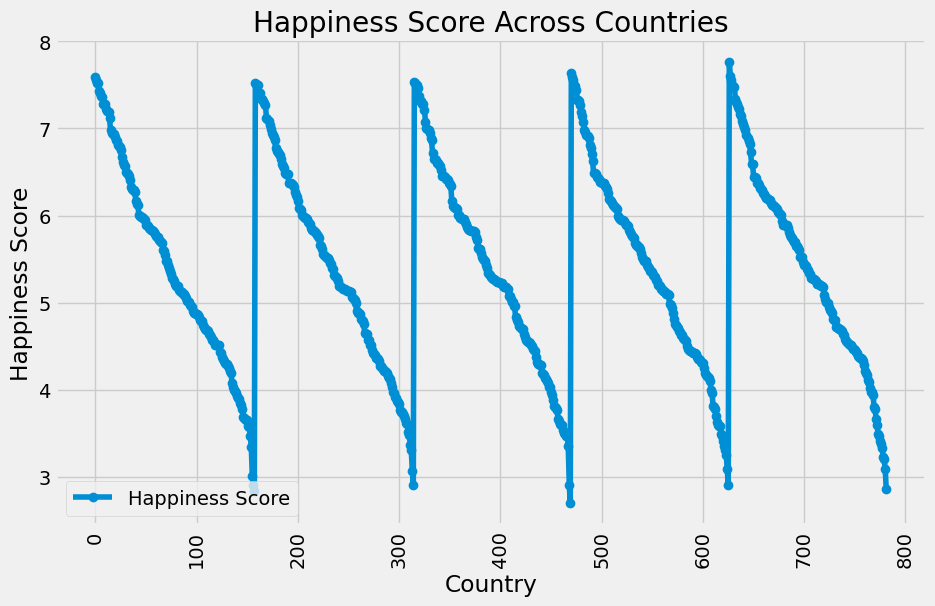

In [57]:

import matplotlib.pyplot as plt

# Assuming 'combined_df' contains your data
plt.figure(figsize=(10, 6))

# Plotting Happiness Score for all countries
plt.plot(combined_df['Happiness Score'], label='Happiness Score', marker='o', linestyle='-')

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Across Countries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)

# Specify the export path
export_path = r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations\Happiness_Score_Across_Countries.png'

# Save the plot as an image
plt.savefig(export_path)

# Show the plot (optional)
plt.show()



The line chart provides a visual representation of how the "Happiness Score" varies across different countries in your dataset. It allows you to compare and analyze happiness scores for each country and identify any trends or patterns. The graph is particularly useful for conveying this information graphically, making it easier for others to understand and interpret the data.

# Decompose Data Components


Decomposing data components typically involves time series data and is commonly done to understand its underlying trends, seasonality, and noise. In my project analysis, I am working with a dataset related to happiness scores across different countries over several years. Since my dataset doesn't appear to be a time series, traditional decomposition methods like seasonal decomposition wouldn't apply.


# Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.

In [61]:
from statsmodels.tsa.stattools import adfuller


happiness_scores = combined_df['Happiness Score']

# Perform the Augmented Dickey-Fuller test
result = adfuller(happiness_scores)

# Rest of your code remains the same
test_statistic = result[0]
p_value = result[1]
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The data is stationary.")
else:
    print("Fail to reject the null hypothesis: The data is non-stationary.")


Reject the null hypothesis: The data is stationary.


Interpretation of Result

If p-value < alpha (significance level): In this case, the p-value is smaller than the chosen significance level (alpha). Therefore, we reject the null hypothesis. This indicates that the data is stationary, and it does not possess a unit root. The statistical properties of the time series do not change over time. In other words, there is evidence to suggest that the data is not trending or seasonally varying.
    
If p-value >= alpha (significance level): If the p-value is greater than or equal to the chosen significance level (alpha), we fail to reject the null hypothesis. This implies that the data is non-stationary, and there may be evidence of trends or seasonality.

# Check your data’s autocorrelations.

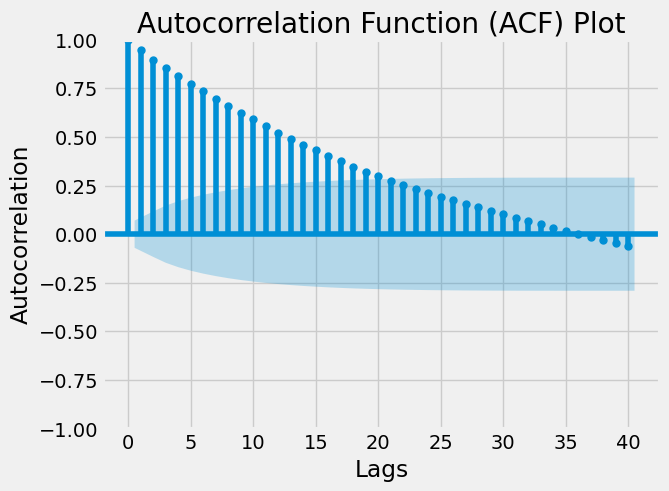

In [62]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'happiness_scores' is your time series data
acf = sm.graphics.tsa.plot_acf(happiness_scores, lags=40)  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.savefig(r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations\ACF_Plot.png', dpi=300, bbox_inches='tight')


#The above chart plots the autocorrelation function (ACF) of the time series data stored in the happiness_scores variable. The lags parameter determines how many lags (time intervals) are considered in the plot. In this case, I've set it to 40, meaning it will show autocorrelations up to 40 time intervals (lags).

In [63]:
# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\kanch\Documents\World Happiness Report\02 Data\Prepared Data.xlsx'  # Replace with your desired file path

# Export the DataFrame to an Excel file
combined_df.to_excel(excel_file_path, index=False)  # Set index to False if you don't want to save the index

print("DataFrame has been exported to Excel successfully.")


DataFrame has been exported to Excel successfully.
